# Домашнее задание 7

In [25]:
import numpy as np
import os
import shutil
from pathlib import Path
from PIL import Image

from imageai.Detection.Custom import DetectionModelTrainer
from imageai.Detection.Custom import CustomObjectDetection

## Подготовка

In [6]:
root_annots_path = '/content/chess-piece-dectection/annotations/'
root_images_path = '/content/chess-piece-dectection/images/'

annots_path = sorted([i for i in Path(root_annots_path).glob('*.xml')])
images_path = sorted([i for i in Path(root_images_path).glob('*.png')])

n_imgs = len(images_path)
print('Количество картинок: ', n_imgs)

Количество картинок:  81


In [7]:
classes = np.array(["white-pawn", "black-pawn",
                    "white-bishop", "black-bishop",
                    "white-knight", "black-knight",
                    "white-king", "black-king",
                    "white-queen", "black-queen",
                    "white-rook", "black-rook"])

In [8]:
with open(annots_path[50], 'r') as f:
    print(f.read())


<annotation>
    <folder>images</folder>
    <filename>chess54.png</filename>
    <size>
        <width>400</width>
        <height>225</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>black-rook</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>203</xmin>
            <ymin>144</ymin>
            <xmax>259</xmax>
            <ymax>213</ymax>
        </bndbox>
    </object>
    <object>
        <name>white-pawn</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>296</xmin>
            <ymin>151</ymin>
            <xmax>359</xmax>
            <ymax>205</ymax>
        </bndbox>
    </object>
    <object>
        <name>black-knight</name>
        <pose>Unspecified</pose>
        <truncated>0</trunca

In [9]:
os.makedirs('/content/chess-piece-dectection/train/images', exist_ok=True)
os.makedirs('/content/chess-piece-dectection/train/annotations', exist_ok=True)

os.makedirs('/content/chess-piece-dectection/validation/images', exist_ok=True)
os.makedirs('/content/chess-piece-dectection/validation/annotations', exist_ok=True)

os.makedirs('/content/chess-piece-dectection/test/images', exist_ok=True)
os.makedirs('/content/chess-piece-dectection/test/annotations', exist_ok=True)

In [10]:
n_split = n_imgs // 20


for i, (annot_path, img_path) in enumerate(zip(annots_path, images_path)):    
    if i > n_imgs:
        break
    if i < n_split:
        shutil.copy(img_path, '/content/chess-piece-dectection/test/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '/content/chess-piece-dectection/test/annotations/' + annot_path.parts[-1])
    elif n_split <= i < n_split*5:
        shutil.copy(img_path, '/content/chess-piece-dectection/validation/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '/content/chess-piece-dectection/validation/annotations/' + annot_path.parts[-1])
    else:
        shutil.copy(img_path, '/content/chess-piece-dectection/train/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '/content/chess-piece-dectection/train/annotations/' + annot_path.parts[-1])

In [11]:
print('test: ', len(list(Path('/content/chess-piece-dectection/train/annotations/').glob('*.xml'))))
print('val: ', len(list(Path('/content/chess-piece-dectection/validation/annotations/').glob('*.xml'))))
print('test: ', len(list(Path('/content/chess-piece-dectection/test/annotations/').glob('*.xml'))))

test:  61
val:  16
test:  4


In [12]:
%cd /content/chess-piece-dectection/
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/chess-piece-dectection
--2021-05-30 20:17:46--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-05-30 20:17:46--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  43.2MB/s    in 5.8s    

2021-05-30 20:17:52 (40.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2021-05-30 20:17:52--
Total wall clock time: 6.2s
Downloaded: 1 files, 237M in 5.8s (40.7 MB/s)


In [13]:
!wget wget https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/convert.py
!wget wget https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/yolov3.cfg

--2021-05-30 20:20:21--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-05-30 20:20:21--  https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/convert.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10093 (9.9K) [text/plain]
Saving to: ‘convert.py’


convert.py            0%[                    ]       0  --.-KB/s               
convert.py          100%[===================>]   9.86K  --.-KB/s    in 0s      

2021-05-30 20:20:21 (86.8 MB/s) - ‘convert.py’ saved [10093/10093]

FINISHED --2021-05-30 20:20:21--
Total wall clock time: 0.1s
Downloaded: 1 files, 9.9K in 0s (86.8 MB/s)
--2021-05-30 20:20:21--  http://wget/
Resolving wget (wget)... failed: Name or service not know

In [14]:
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved Keras model to yolov3.h5
Read 62001757 of 62001757.0 from Darknet weights.


In [59]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3() 
trainer.setDataDirectory(data_directory='/content/chess-piece-dectection/') 
trainer.setTrainConfig(object_names_array=classes,
                       batch_size=8,
                       num_experiments=20,
                       train_from_pretrained_model='/content/chess-piece-dectection/yolov3.h5',
                       )

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.81
Anchor Boxes generated.
Detection configuration saved in  /content/chess-piece-dectection/json/detection_config.json


In [60]:
trainer.trainModel()

Evaluating over 16 samples taken from /content/chess-piece-dectection/validation
Training over 61 samples  given at /content/chess-piece-dectection/train
Training on: 	['black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
Training with Batch Size:  8
Number of Training Samples:  61
Number of Validation Samples:  16
Number of Experiments:  20
Training with transfer learning from pretrained Model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic

Epoch 1/20
64/64 [==============================] - 53s 815ms/step - loss: 154.6178 - yolo_layer_12_loss: 25.4219 - yolo_layer_13_loss: 34.3221 - yolo_layer_14_loss: 83.2923 - val_loss: 179.4652 - val_yolo_layer_12_loss: 19.3695 - val_yolo_layer_13_loss: 38.0882 - val_yolo_layer_14_loss: 110.4237
Epoch 2/20
64/64 [==============================] - 55s 840ms/step - loss: 88.2888 - yolo_layer_12_loss: 18.6528 - yolo_layer_13_loss: 18.6491 - yolo_layer_14_loss: 39.4019 - val_loss: 113.5256 - val_yolo_layer_12_loss: 17.5068 - val_yolo_layer_13_loss: 19.5689 - val_yolo_layer_14_loss: 64.8653
Epoch 3/20
64/64 [==============================] - 56s 864ms/step - loss: 69.4577 - yolo_layer_12_loss: 13.4563 - yolo_layer_13_loss: 14.9140 - yolo_layer_14_loss: 29.5074 - val_loss: 81.0336 - val_yolo_layer_12_loss: 15.7457 - val_yolo_layer_13_loss: 18.0971 - val_yolo_layer_14_loss: 35.6160
Epoch 4/20
64/64 [==============================] - 54s 828ms/step - loss: 63.6003 - yolo_layer_12_loss: 12.488

In [61]:
model_path = sorted(list(Path('/content/chess-piece-dectection/models/').iterdir()))[-1]
model_path

PosixPath('/content/chess-piece-dectection/models/detection_model-ex-020--loss-0035.238.h5')

In [62]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/chess-piece-dectection/")
metrics = trainer.evaluateModel(model_path=model_path,
                                json_path="/content/chess-piece-dectection/json/detection_config.json",
                                iou_threshold=0.2,
                                object_threshold=0.3,
                                nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 16 samples taken from /content/chess-piece-dectection/validation
Training over 61 samples  given at /content/chess-piece-dectection/train
Model File:  /content/chess-piece-dectection/models/detection_model-ex-020--loss-0035.238.h5 

Evaluation samples:  16
Using IoU:  0.2
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
black-bishop: 0.1558
black-king: 0.0000
black-knight: 0.0000
black-pawn: 0.3239
black-queen: 0.0000
black-rook: 0.2500
white-bishop: 0.0000
white-king: 0.0000
white-knight: 0.0556
white-pawn: 0.3056
white-queen: 0.0000
white-rook: 0.2000
mAP: 0.1076


In [63]:
input_image_path="/content/chess-piece-dectection/test/images/chess0.png"
output_image_path="/content/chess-piece-dectection/test/images/detected.jpg"

In [72]:
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)
detector.setJsonPath("/content/chess-piece-dectection/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(minimum_percentage_probability=60,
                                             input_image=input_image_path,
                                             output_image_path=output_image_path)
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

black-pawn  :  70.48661708831787  :  [74, 95, 125, 203]
black-knight  :  66.32099151611328  :  [66, 114, 138, 209]
black-queen  :  81.5179169178009  :  [66, 114, 138, 209]
black-bishop  :  66.53630137443542  :  [217, 19, 253, 78]
black-knight  :  64.67615962028503  :  [217, 20, 256, 108]
black-queen  :  73.0771541595459  :  [217, 20, 256, 108]
black-bishop  :  68.33552718162537  :  [91, 103, 134, 146]
black-pawn  :  60.0365936756134  :  [91, 103, 134, 146]
black-queen  :  66.77230596542358  :  [170, 138, 210, 197]
white-king  :  70.34650444984436  :  [170, 138, 210, 197]
white-queen  :  60.95092296600342  :  [170, 138, 210, 197]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


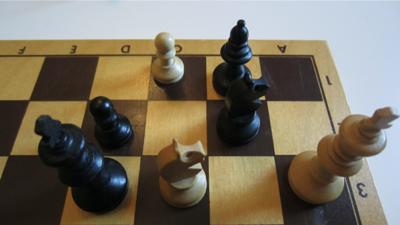

In [52]:
Image.open(input_image_path)

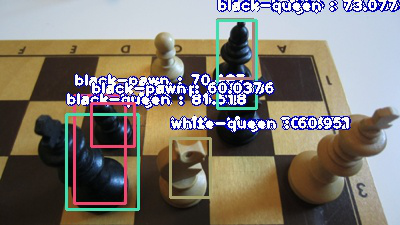

In [73]:
Image.open(output_image_path)

## Вывод 

Обучение на 10 эпохах дало весьма не самый лучший результат. На 20 - результат был лучше. <br>
Очевидно, при увеличении количества эпох качество будет повышаться.